In [1]:
import pandas as pd
import numpy as np

# Israel 資料集：編碼後使用 smote and spreadsubsample

In [2]:
# data that encoded before smote and spreadsubsample
data = pd.read_csv('Israel Covid Dataset Preprocessed - class - S & S.csv')
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cough                                   33744 non-null  float64
 1   fever                                   33744 non-null  float64
 2   sore_throat                             33744 non-null  float64
 3   shortness_of_breath                     33744 non-null  float64
 4   head_ache                               33744 non-null  float64
 5   age_60_and_above                        33744 non-null  float64
 6   gender_female                           33744 non-null  int64  
 7   gender_male                             33744 non-null  int64  
 8   test_indication_Abroad                  33744 non-null  int64  
 9   test_indication_Contact with confirmed  33744 non-null  int64  
 10  test_indication_Other                   33744 non-null  in

In [5]:
# cluster library
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Inertia')

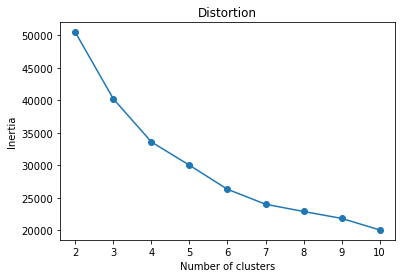

In [31]:
# Kmeans： finding k with inertia

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

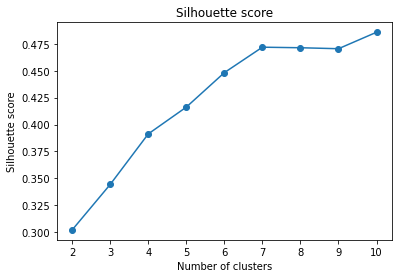

In [33]:
# Kmeans： finding k with silhouette score

silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    silhouette_avg.append(silhouette_score(data, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

# Israel 資料集：編碼前使用 smote and spreadsubsample

In [25]:
# data that encoded atfer smote and spreadsubsample
data1 = pd.read_csv('Israel Covid Dataset To All Nominal - S & S.csv')
data1.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
33739,No,No,No,No,No,No,male,Contact with confirmed,positive
33740,No,No,No,No,No,No,male,Contact with confirmed,positive
33741,Yes,No,No,No,No,No,male,Contact with confirmed,positive
33742,Yes,Yes,Yes,No,Yes,No,female,Other,positive
33743,No,Yes,Yes,No,No,No,male,Contact with confirmed,positive


In [26]:
data1.replace(['Yes', 'No', 'positive', 'negative'], [1, 0, 1, 0], inplace = True)
data1.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
33739,0,0,0,0,0,0,male,Contact with confirmed,1
33740,0,0,0,0,0,0,male,Contact with confirmed,1
33741,1,0,0,0,0,0,male,Contact with confirmed,1
33742,1,1,1,0,1,0,female,Other,1
33743,0,1,1,0,0,0,male,Contact with confirmed,1


In [27]:
data1 = pd.get_dummies(data1, columns = ['gender', 'test_indication'])
c = data1.pop('corona_result')
data1['corona_result'] = c
data1.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
33739,0,0,0,0,0,0,0,1,0,1,0,1
33740,0,0,0,0,0,0,0,1,0,1,0,1
33741,1,0,0,0,0,0,0,1,0,1,0,1
33742,1,1,1,0,1,0,1,0,0,0,1,1
33743,0,1,1,0,0,0,0,1,0,1,0,1


In [37]:
data1.to_csv('Israel Covid Dataset All Nominal - encode after S & S.csv', index = False)

Text(0, 0.5, 'Inertia')

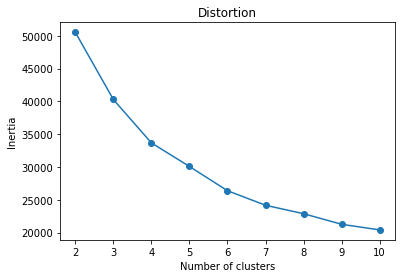

In [32]:
# Kmeans： finding k with inertia

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data1)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

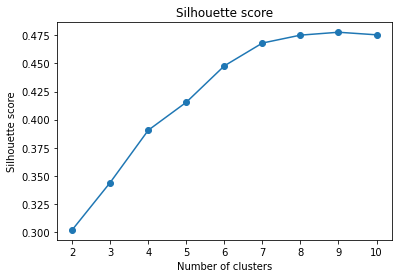

In [34]:
# Kmeans： finding k with silhouette score

silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data1)
    silhouette_avg.append(silhouette_score(data, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

# 我們的資料集：編碼前使用 smote and spreadsubsample

In [5]:
data2 = pd.read_csv('Covid Dataset - 轉成 1 和 0 - encode after S & S.csv')
data2.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
4199,0,0,0,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
4200,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4201,1,0,1,1,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
4202,0,0,0,0,1,1,0,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4203,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        4204 non-null   int64
 1   Fever                                    4204 non-null   int64
 2   Dry Cough                                4204 non-null   int64
 3   Sore throat                              4204 non-null   int64
 4   Running Nose                             4204 non-null   int64
 5   Asthma                                   4204 non-null   int64
 6   Chronic Lung Disease                     4204 non-null   int64
 7   Headache                                 4204 non-null   int64
 8   Heart Disease                            4204 non-null   int64
 9   Diabetes                                 4204 non-null   int64
 10  Hyper Tension                            4204 non-null   int64
 11  Fati

In [40]:
data2.drop(columns = ['Wearing Masks', 'Sanitization from Market'], inplace = True)
data2.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
4199,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0
4200,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4201,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
4202,0,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0
4203,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0


Text(0, 0.5, 'Inertia')

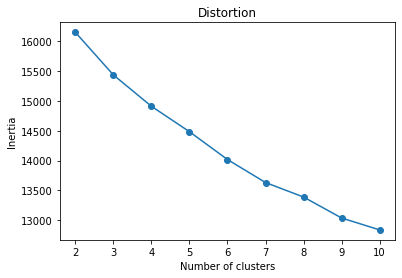

In [41]:
# Kmeans

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data2)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

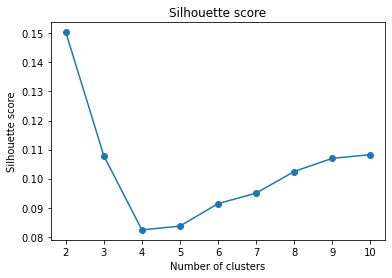

In [43]:
silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data2)
    silhouette_avg.append(silhouette_score(data2, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

# 我們的資料集：編碼後使用 smote and spreadsubsample

In [44]:
data3 = pd.read_csv('Covid Dataset - 轉成 1 和 0 - S & S after encoded.csv')
data3.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
4199,0,0.0,0,0,1,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0,0.0,0.0,0.0,0.0,0,0,0
4200,0,0.0,0,0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0,0,0
4201,1,0.0,1,1,0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0,0.0,0.0,1.0,1.0,0,0,0
4202,0,0.0,0,0,1,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0,0.0,0.0,0.0,1.0,0,0,0
4203,0,0.0,1,0,0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0,0.0,0.0,0.0,0.0,0,0,0


In [46]:
data3.drop(columns = ['Wearing Masks', 'Sanitization from Market'], inplace = True)
data3.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
4199,0,0.0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0
4200,0,0.0,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0
4201,1,0.0,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.0,0.0,1.0,1.0,0
4202,0,0.0,0,0,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0
4203,0,0.0,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0


Text(0, 0.5, 'Inertia')

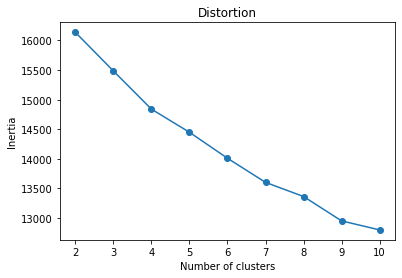

In [47]:
# Kmeans

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data3)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

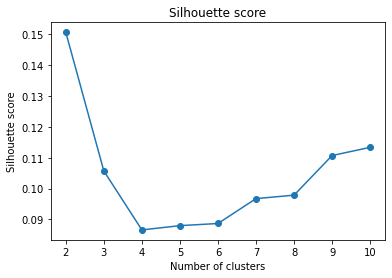

In [48]:
silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data3)
    silhouette_avg.append(silhouette_score(data3, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')